Вариант К3 "Раунды CS:GO" предсказать "bomb_planted"

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

In [90]:
df= pd.read_csv('csgo_task.csv')

Каждая строка описывает отдельный раунд в случайных матчах,
- time_left   float64 оставшееся время
- ct_score    int64      Сколько раундов до этого выиграла эта сторона 
- t_score     int64      Сколько раундов до этого выиграла эта сторона 
- map    object - на какой карте был сыгран раунд 
- bomb_planted   bool  - Была ли заложена бомба
- ct_health     int64   суммарное здоровье команды 
- t_health      int64  суммарное здоровье команды
- ct_armor   int64  суммарная броня команды
- t_armor    int64  суммарная броня команды
- ct_money  int64  суммарные деньги в команде
- t_money     int64  суммарные деньги в команде
- ct_helmets   int64  количество шлемов в команде
- t_helmets     int64  количество шлемов в команде
- ct_defuse_kits   int64  количество дефузов в команде кт
- ct_players_alive  int64  количество живых в команде в конце раунда
- t_players_alive количество живых в команде в конце раунда

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   time_left         122410 non-null  float64
 1   ct_score          122410 non-null  float64
 2   t_score           121386 non-null  float64
 3   map               122199 non-null  object 
 4   bomb_planted      122410 non-null  bool   
 5   ct_health         122410 non-null  float64
 6   t_health          121627 non-null  float64
 7   ct_armor          122410 non-null  float64
 8   t_armor           122410 non-null  float64
 9   ct_money          122410 non-null  float64
 10  t_money           122410 non-null  float64
 11  ct_helmets        121766 non-null  float64
 12  t_helmets         121560 non-null  float64
 13  ct_defuse_kits    121766 non-null  float64
 14  ct_players_alive  122410 non-null  float64
 15  t_players_alive   122182 non-null  float64
dtypes: bool(1), float64(

In [92]:
df.head(20)

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,5.0,5.0
5,114.97,1.0,0.0,de_dust2,False,500.0,500.0,500.0,0.0,1750.0,10550.0,5.0,0.0,1.0,5.0,5.0
6,94.97,1.0,0.0,de_dust2,False,295.0,111.0,296.0,0.0,1700.0,5000.0,3.0,0.0,0.0,3.0,2.0
7,74.97,1.0,0.0,de_dust2,False,295.0,111.0,296.0,0.0,1700.0,5000.0,3.0,0.0,0.0,3.0,2.0
8,54.97,1.0,0.0,de_dust2,False,249.0,89.0,269.0,0.0,2300.0,2950.0,3.0,0.0,0.0,3.0,1.0
9,174.97,2.0,0.0,de_dust2,False,500.0,500.0,196.0,0.0,19800.0,23450.0,2.0,0.0,0.0,5.0,5.0


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   time_left         122410 non-null  float64
 1   ct_score          122410 non-null  float64
 2   t_score           121386 non-null  float64
 3   map               122199 non-null  object 
 4   bomb_planted      122410 non-null  bool   
 5   ct_health         122410 non-null  float64
 6   t_health          121627 non-null  float64
 7   ct_armor          122410 non-null  float64
 8   t_armor           122410 non-null  float64
 9   ct_money          122410 non-null  float64
 10  t_money           122410 non-null  float64
 11  ct_helmets        121766 non-null  float64
 12  t_helmets         121560 non-null  float64
 13  ct_defuse_kits    121766 non-null  float64
 14  ct_players_alive  122410 non-null  float64
 15  t_players_alive   122182 non-null  float64
dtypes: bool(1), float64(

In [94]:
df.describe()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive
count,122410.000000,122410.000000,121386.000000,122410.000000,121627.000000,122410.000000,122410.000000,122410.000000,122410.000000,121766.000000,121560.000000,121766.000000,122410.000000,122182.000000
mean,97.886922,6.709239,6.785412,412.106568,402.724773,314.142121,298.444670,9789.023773,11241.036680,2.054794,2.772869,1.613447,4.273752,4.266038
std,54.465238,4.790362,4.824752,132.293290,139.911535,171.029736,174.576545,11215.042286,12162.806759,1.841505,2.011093,1.605278,1.205500,1.228508
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.920000,3.000000,3.000000,350.000000,322.000000,194.000000,174.000000,1300.000000,1550.000000,0.000000,0.000000,0.000000,4.000000,4.000000
50%,94.910000,6.000000,6.000000,500.000000,500.000000,377.000000,334.000000,5500.000000,7150.000000,2.000000,3.000000,1.000000,5.000000,5.000000
75%,166.917500,10.000000,10.000000,500.000000,500.000000,486.000000,468.000000,14600.000000,18000.000000,4.000000,5.000000,3.000000,5.000000,5.000000
max,175.000000,32.000000,33.000000,500.000000,600.000000,500.000000,500.000000,80000.000000,80000.000000,5.000000,5.000000,5.000000,5.000000,6.000000


<font size=4><b>Из описания видно:</b> 

1. Отсутствуют некотрые заначения в столбцах "t_score", "t_helmets", "t_health", "ct_helmets", "ct_defuse_kits", "t_players_alive", "map"
2. В юольшинстве столбцов использован тип данных float64, хотя во всех кроме "time_left", это не оправданно, поскольку там только целые значения
3. Также в столбце "t_health" имеется значение <b>600</b> хотя исходя из предметной области там максимально <b>500</b>, такая же ошибка есть в "t_players_alive" <b>6</b> живых при максимальном <b>5</b>
<font>

In [95]:
df["map"].unique()

array(['de_dust2', 'de_mirage', nan, 'de_nuke', 'de_inferno',
       'de_overpass', 'de_vertigo', 'de_train', 'de_cache'], dtype=object)

In [96]:
(df.isna().sum()/df.shape[0]*100).sort_values(ascending=False)

t_score             0.836533
t_helmets           0.694388
t_health            0.639654
ct_helmets          0.526101
ct_defuse_kits      0.526101
t_players_alive     0.186259
map                 0.172372
ct_score            0.000000
ct_armor            0.000000
ct_health           0.000000
bomb_planted        0.000000
time_left           0.000000
t_money             0.000000
ct_money            0.000000
t_armor             0.000000
ct_players_alive    0.000000
dtype: float64

<font size=4><b>Недостающее значение данных в следующих столбцах:</b>

- t_score
- t_helmets     
- t_health
- ct_helmets
- ct_defuse_kits
- t_players_alive
- map
</font>

<font size=4><b>Предположения для заполнения пропущенного значения:</b>

- Так же количество пропущенных значений меньше 1% можно не сильно переживать изза способа заполнений пропуска.
- Поскольку "map" является категориальными данными, считаю, что пропуски лучше заполнить модой.
- Для "t_score", "t_helmets", "ct_helmets", "ct_defuse_kits" можно заполнить средним значением.
- Для "t_players_alive" можно заполнять по правилу:
    - если "ct_players_alive" != 0 и "time_left" > 0 и "bomb_planted" == 0 , то берем 0;  
    - во всех остальных случаях среднее;
- Для "t_health" можно использовать значение из "t_players_alive" умноженное на среднее из "t_health"/5
</font>

## Обработка пропущенных значений

In [97]:
# Заполнение пропусков в map используя моду и провепрка на отсутствие пропуков 
df["map"].fillna(df["map"].mode()[0], inplace=True)

df["map"].isna().sum()

C:\Users\nikit\AppData\Local\Temp\ipykernel_7960\2098368339.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["map"].fillna(df["map"].mode()[0], inplace=True)


np.int64(0)

In [98]:
# Заполнение пропусков в "t_score", "t_helmets", "ct_helmets", "ct_defuse_kits" средним значением
df["t_score"].fillna(df["t_score"].mean(), inplace=True)
df["t_helmets"].fillna(df["t_helmets"].mean(), inplace=True)
df["ct_helmets"].fillna(df["ct_helmets"].mean(), inplace=True)
df["ct_defuse_kits"].fillna(df["ct_defuse_kits"].mean(), inplace=True)


C:\Users\nikit\AppData\Local\Temp\ipykernel_7960\809303523.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["t_score"].fillna(df["t_score"].mean(), inplace=True)
C:\Users\nikit\AppData\Local\Temp\ipykernel_7960\809303523.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [99]:
# Заполнение пропусков в "t_players_alive" используя правило
def fill_t_players_alive(row):
    if pd.isna(row['t_players_alive']):
        if row['ct_players_alive'] != 0 and row['time_left'] > 0 and row['bomb_planted'] == 0:
            return 0
        else:
            return df['t_players_alive'].mean()
    else:
        return row['t_players_alive']

df['t_players_alive'] = df.apply(fill_t_players_alive, axis=1)
 
 

In [100]:
# Заполнение пропусков в "t_health" используя правило
mean_t_health = df['t_health'].mean()/5
def fill_t_health(row):
    if pd.isna(row['t_health']):
        return row["t_players_alive"] * mean_t_health
    else:
        return row['t_health']



df['t_health'] = df.apply(fill_t_health, axis=1)

In [101]:
df.isna().sum()

time_left           0
ct_score            0
t_score             0
map                 0
bomb_planted        0
ct_health           0
t_health            0
ct_armor            0
t_armor             0
ct_money            0
t_money             0
ct_helmets          0
t_helmets           0
ct_defuse_kits      0
ct_players_alive    0
t_players_alive     0
dtype: int64

In [102]:
df['t_players_alive'] = df['t_players_alive'].replace(6, 5)
df['t_health'] = df['t_health'].replace(600, 500)

## Коррекция типов данных


В большинстве столбцов использован тип данных float64, хотя во всех кроме "time_left", это не оправданно, поскольку там только целые значения

In [103]:
df["ct_score"] = df["ct_score"].astype(int)
df["ct_health"] = df["ct_health"].astype(int)
df["ct_armor"] = df["ct_armor"].astype(int)
df["ct_money"] = df["ct_money"].astype(int)
df["ct_helmets"] = df["ct_helmets"].astype(int)
df["ct_defuse_kits"] = df["ct_defuse_kits"].astype(int)
df["ct_players_alive"] = df["ct_players_alive"].astype(int)

df["t_score"] = df["t_score"].astype(int)
df["t_health"] = df["t_health"].astype(int)
df["t_armor"] = df["t_armor"].astype(int)
df["t_money"] = df["t_money"].astype(int)
df["t_helmets"] = df["t_helmets"].astype(int)
df["t_players_alive"] = df["t_players_alive"].astype(int)


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   time_left         122410 non-null  float64
 1   ct_score          122410 non-null  int64  
 2   t_score           122410 non-null  int64  
 3   map               122410 non-null  object 
 4   bomb_planted      122410 non-null  bool   
 5   ct_health         122410 non-null  int64  
 6   t_health          122410 non-null  int64  
 7   ct_armor          122410 non-null  int64  
 8   t_armor           122410 non-null  int64  
 9   ct_money          122410 non-null  int64  
 10  t_money           122410 non-null  int64  
 11  ct_helmets        122410 non-null  int64  
 12  t_helmets         122410 non-null  int64  
 13  ct_defuse_kits    122410 non-null  int64  
 14  ct_players_alive  122410 non-null  int64  
 15  t_players_alive   122410 non-null  int64  
dtypes: bool(1), float64(

## Обогащение данных

In [105]:
df= pd.get_dummies(df, columns=['map'], prefix='map', drop_first=True)

# Итоговый датасет
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   time_left         122410 non-null  float64
 1   ct_score          122410 non-null  int64  
 2   t_score           122410 non-null  int64  
 3   bomb_planted      122410 non-null  bool   
 4   ct_health         122410 non-null  int64  
 5   t_health          122410 non-null  int64  
 6   ct_armor          122410 non-null  int64  
 7   t_armor           122410 non-null  int64  
 8   ct_money          122410 non-null  int64  
 9   t_money           122410 non-null  int64  
 10  ct_helmets        122410 non-null  int64  
 11  t_helmets         122410 non-null  int64  
 12  ct_defuse_kits    122410 non-null  int64  
 13  ct_players_alive  122410 non-null  int64  
 14  t_players_alive   122410 non-null  int64  
 15  map_de_dust2      122410 non-null  bool   
 16  map_de_inferno    12

## EDA

### 1. Распределение целевой переменной

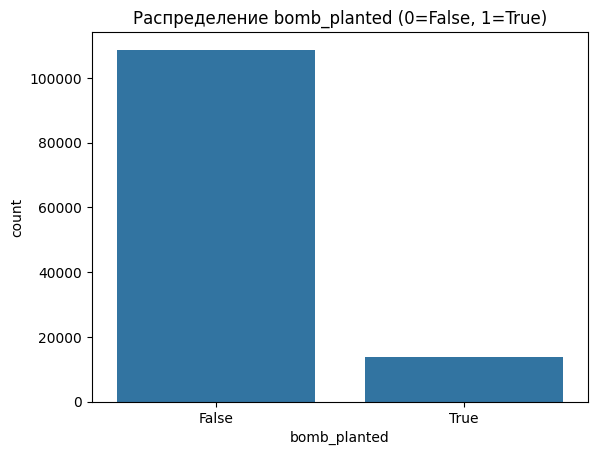

bomb_planted
False    0.888212
True     0.111788
Name: proportion, dtype: float64

In [106]:
sns.countplot(x="bomb_planted", data=df)
plt.title("Распределение bomb_planted (0=False, 1=True)")
plt.show()
df["bomb_planted"].value_counts(normalize=True)

Видим что сильный дисбаланс (11% True), учтём при анализе.

### 2. Время раунда (time_left)

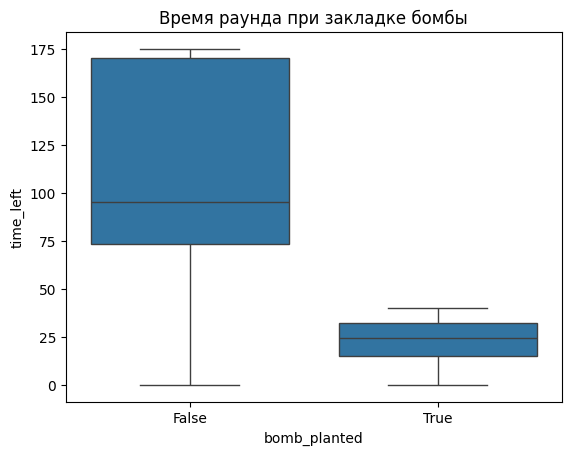

In [107]:
sns.boxplot(x="bomb_planted", y="time_left", data=df)
plt.title("Время раунда при закладке бомбы")
plt.show()

Видим: что 
- бомба закладывалась ближе к концу раунда (всегда) и сильного расхождения нет
- чаще всего в раунде который был не долгим не заложено бомбы 

### 3. Количество живых T (t_players_alive)

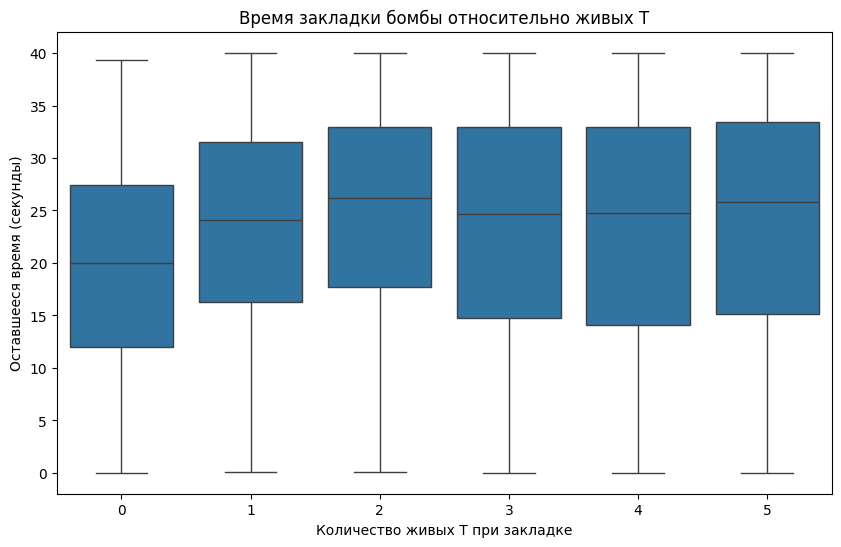

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

# Фильтр: только раунды с закладкой бомбы
df_bomb = df[df['bomb_planted'] == True]

# Распределение времени закладки по количеству живых T
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_bomb, x='t_players_alive', y='time_left')
plt.title("Время закладки бомбы относительно живых T")
plt.xlabel("Количество живых T при закладке")
plt.ylabel("Оставшееся время (секунды)")
plt.show()

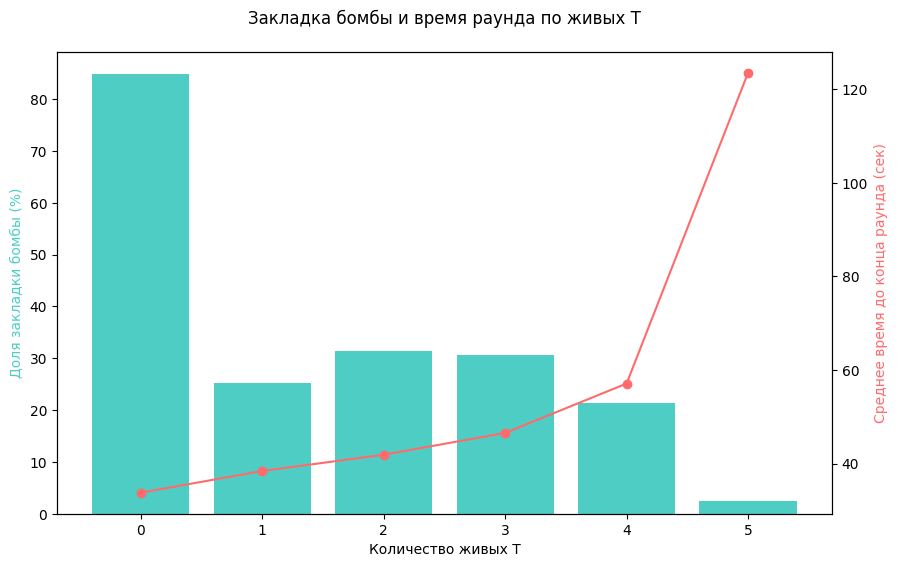

In [114]:
bomb_stats = df.groupby('t_players_alive').agg(
    bomb_rate=('bomb_planted', 'mean'),
    avg_time_left=('time_left', 'mean')
).reset_index()

# Визуализация
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(bomb_stats['t_players_alive'], bomb_stats['bomb_rate']*100, color='#4ECDC4')
ax1.set_xlabel('Количество живых T')
ax1.set_ylabel('Доля закладки бомбы (%)', color='#4ECDC4')
ax2 = ax1.twinx()
ax2.plot(bomb_stats['t_players_alive'], bomb_stats['avg_time_left'], color='#FF6B6B', marker='o')
ax2.set_ylabel('Среднее время до конца раунда (сек)', color='#FF6B6B')
plt.title('Закладка бомбы и время раунда по живых T', pad=20)
plt.show()

Исходя из этого можно считать:
- при любом t_players_alive время до конца раунда близко к 20, значит закладка происходит ближе к концу раунда
- также чаще всего закладка происходит при t_players_alive < 5

### 4. Деньги T (t_money)

C:\Users\nikit\AppData\Local\Temp\ipykernel_7960\887345447.py:3: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.kdeplot(data=df_bomb, x='t_money', hue='bomb_planted', fill=True, palette=['#FF6B6B', '#4ECDC4'])


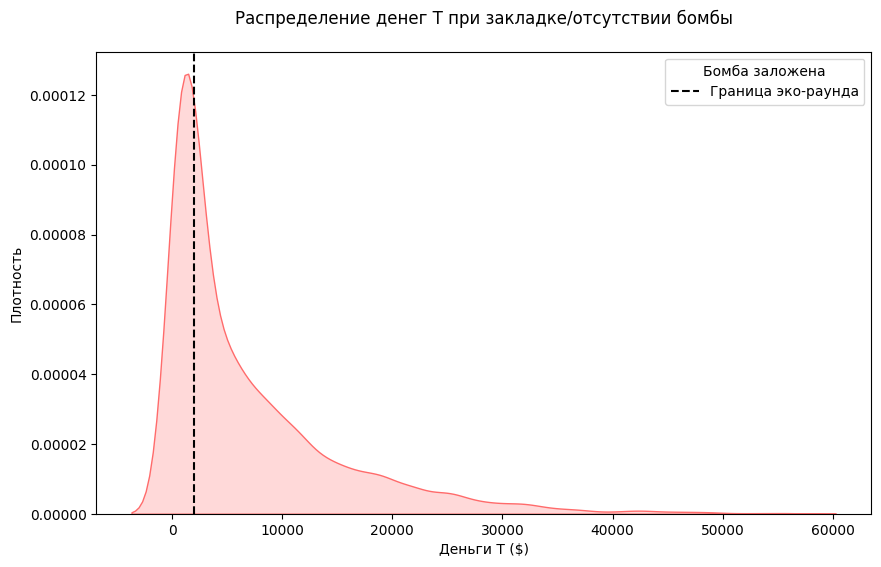

In [116]:
plt.figure(figsize=(10, 6))
df_bomb = df[df['bomb_planted'] == True]
sns.kdeplot(data=df_bomb, x='t_money', hue='bomb_planted', fill=True, palette=['#FF6B6B', '#4ECDC4'])
plt.axvline(2000, color='black', linestyle='--', label='Граница эко-раунда')
plt.title('Распределение денег T при закладке/отсутствии бомбы', pad=20)
plt.xlabel('Деньги T ($)')
plt.ylabel('Плотность')
plt.legend(title='Бомба заложена')
plt.show()

In [123]:
eco_plant_rate = df[df['t_money'] < 2000]['bomb_planted'].mean()
non_eco_plant_rate = df[df['t_money'] >= 2000]['bomb_planted'].mean()

print(f"Частота закладки в эко-раундах: {eco_plant_rate:.1%}")
print(f"Частота закладки при нормальном бюджете: {non_eco_plant_rate:.1%}")

Частота закладки в эко-раундах: 14.6%
Частота закладки при нормальном бюджете: 9.8%


означает что чаще всего закладка происходит на малом бюджете

### 5.  Взаимодействие признаков

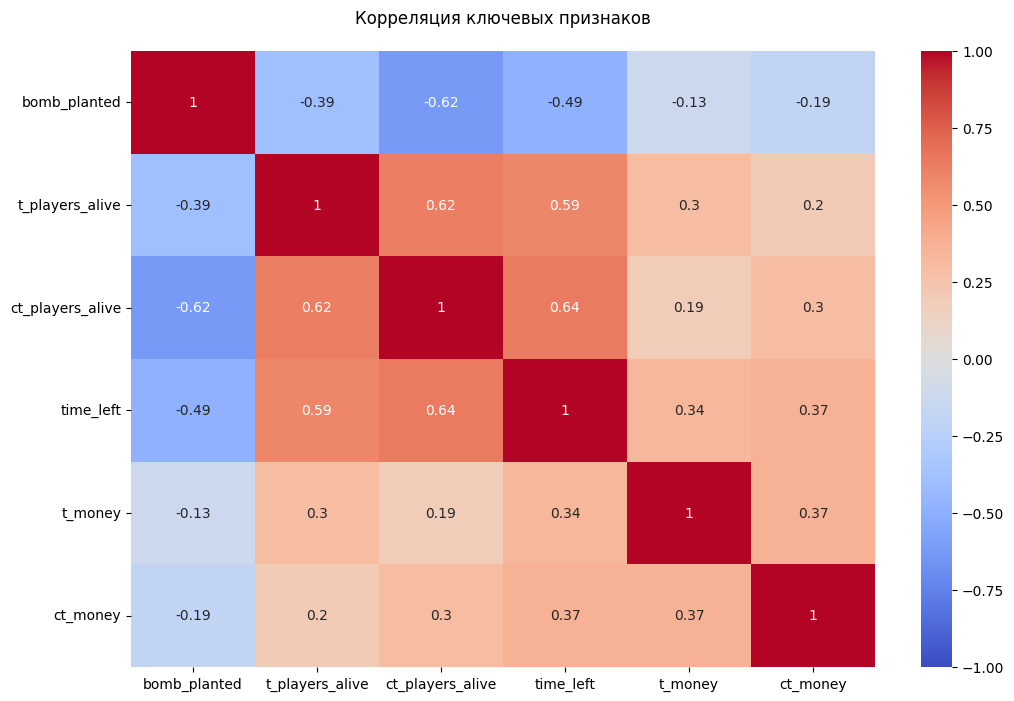

In [122]:
# Heatmap корреляции
plt.figure(figsize=(12, 8))
sns.heatmap(df[['bomb_planted', 't_players_alive', 'ct_players_alive', 
               'time_left', 't_money', 'ct_money']].corr(),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляция ключевых признаков', pad=20)
plt.show()

Для ключевого признака bomb_planted: 
- есть умеренная обратная связь с ct_players_alive 
- умеренная связь с time_left, что значит что чем ближе к концу раунда тем чаще происходил плент